In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import v_measure_score
import time
import tqdm

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'chest']
datas_full_name = ["miniImageNet_test", "CropDisease", "EuroSAT", "ISIC", "ChestX"]
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

colors = ["#FF0000", "#FFBB00", "#00B700" , "#0100FF", "#8324FF", # vivid
          "#ED9595", "#EDCE7A", "#86E57F", "#6799FF", "#BFA0ED"] # pale
source_colors = ["#FF0000", "#FFBB00", "#00B700" , "#0100FF", "#8324FF", 
          "#FF00DD", "#00C6ED", "#670000", "#6B9900", "#353535"]

import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts

['Times New Roman']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc



miniImageNet_test

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.934743


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.554626
[t-SNE] KL divergence after 1000 iterations: 0.802686

CropDisease



/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.031918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.354553
[t-SNE] KL divergence after 1000 iterations: 0.528695

EuroSAT



/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.304763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.671322
[t-SNE] KL divergence after 850 iterations: 0.577213

ISIC

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.006s...


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.100439
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.717300
[t-SNE] KL divergence after 950 iterations: 0.513266

ChestX



/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 2.293398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.401573
[t-SNE] KL divergence after 1000 iterations: 0.685489


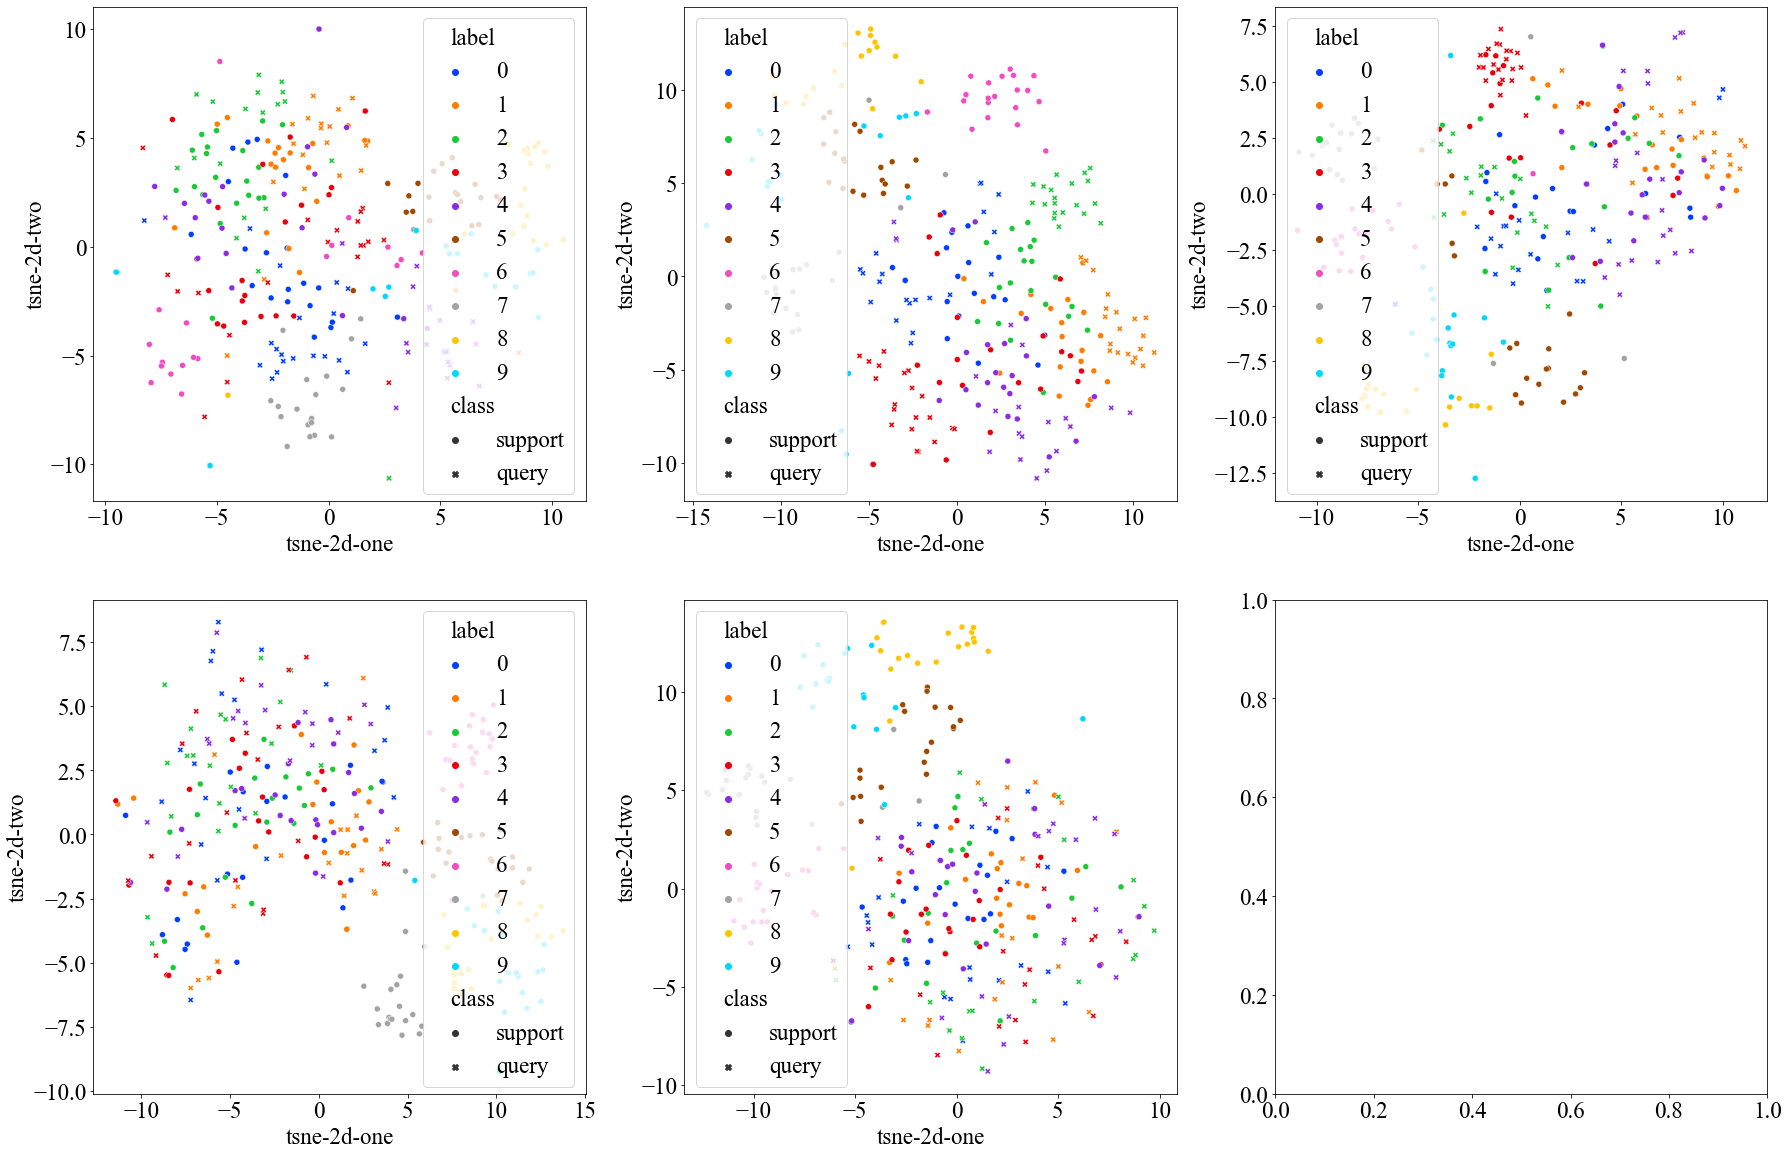

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [199]:
#f, axes = plt.subplots(2,3, figsize=(30,20))
row=0
col=0
for data in datas_full_name: 
    print("\n{}\n".format(data))
    # source
    source_feature_path = './feature/miniImageNet/baseline/source_df.csv'
    df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
    df_source.columns = list(range(512))
    df_source['label'] = np.repeat(np.arange(5, 10), 20)
    df_source['class'] = 'support'

    # clean support 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]
    df_support['label'] = np.repeat(np.arange(5), 20)
    df_support['class'] = 'support'

    # query
    df_query = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    query_feature_path = './feature/{}/baseline/query.npy'.format(data)
    query_feature = np.load(query_feature_path)
    for i in range(1, 101):
        df_query.loc[i,:] = query_feature[i-1]
    df_query['label'] = np.repeat(np.arange(5), 20)
    df_query['class'] = 'query'

    # mixup
    df_mixup = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    mixup_feature_path = './feature/{}/mixup/support.npy'.format(data)
    mixup_feature = np.load(mixup_feature_path)
    for i in range(1, 101):
        df_mixup.loc[i,:] = mixup_feature[i-1]
    df_mixup['label'] = np.repeat(np.arange(5), 20)
    df_mixup['class'] = 'support'

    # cutmix
    df_cutmix = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    cutmix_feature_path = './feature/{}/cutmix/support.npy'.format(data)
    cutmix_feature = np.load(cutmix_feature_path)
    for i in range(1, 101):
        df_cutmix.loc[i,:] = cutmix_feature[i-1]
    df_cutmix['label'] = np.repeat(np.arange(5), 20)
    df_cutmix['class'] = 'target'

    # flip
    df_flip = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    flip_feature_path = './feature/{}/flip/support.npy'.format(data)
    flip_feature = np.load(flip_feature_path)
    for i in range(1, 101):
        df_flip.loc[i,:] = flip_feature[i-1]
    df_flip['label'] = np.repeat(np.arange(5), 20)
    df_flip['class'] = 'target'
    
    # crop
    df_crop = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    crop_feature_path = './feature/{}/crop/support.npy'.format(data)
    crop_feature = np.load(crop_feature_path)
    for i in range(1, 101):
        df_crop.loc[i,:] = crop_feature[i-1]
    df_crop['label'] = np.repeat(np.arange(5), 20)
    df_crop['class'] = 'target'
    
    df = pd.concat([df_mixup, df_query, df_source], axis=0, join='inner')
    data_subset = df.iloc[:, :512].values
    data_subset.shape
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)
    
    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=sns.color_palette("bright", 10), 
        style = "class",
        data=df,
        #legend="full",
        ax=axes[row,col]
    )
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    
plt.show()

### Domain difference


miniImageNet_test

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 4.552915


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.222919
[t-SNE] KL divergence after 1000 iterations: 0.435238


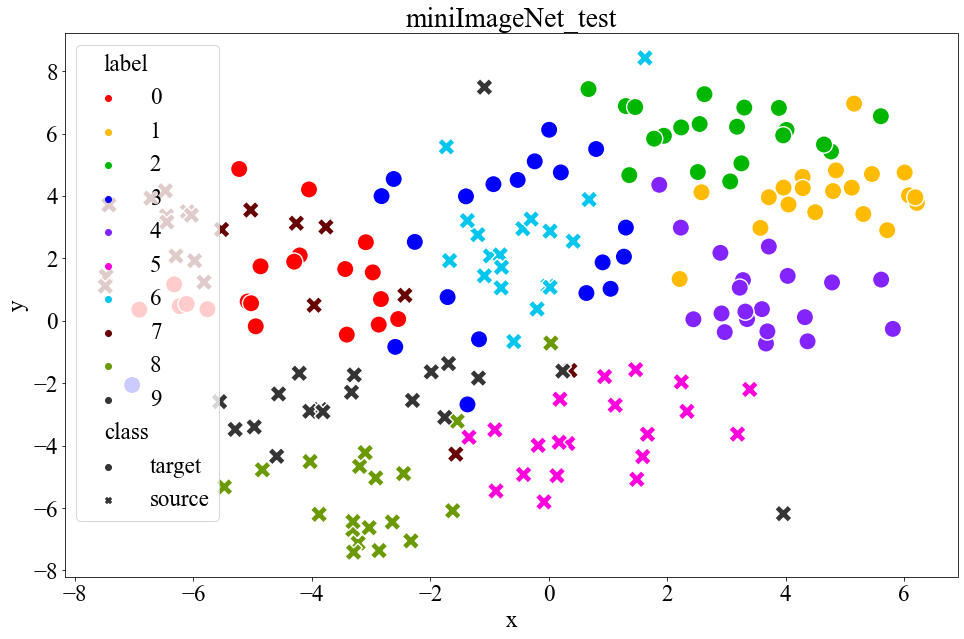

In [241]:
# f, axes = plt.subplots(2,3, figsize=(30,20))
row=0
col=0
for data in datas_full_name: 
    print("\n{}\n".format(data))
    # source
    source_feature_path = './feature/miniImageNet/baseline/source_df.csv'
    df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
    df_source.columns = list(range(512))
    df_source['label'] = np.repeat(np.arange(5, 10), 20)
    df_source['class'] = 'source'

    # clean support 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]
    df_support['label'] = np.repeat(np.arange(5), 20)
    df_support['class'] = 'target'

#     # query
#     df_query = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     query_feature_path = './feature/{}/baseline/query.npy'.format(data)
#     query_feature = np.load(query_feature_path)
#     for i in range(1, 101):
#         df_query.loc[i,:] = query_feature[i-1]
#     df_query['label'] = np.repeat(np.arange(5), 20)
#     df_query['class'] = 'query'

#     # mixup
#     df_mixup = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     mixup_feature_path = './feature/{}/mixup/support.npy'.format(data)
#     mixup_feature = np.load(mixup_feature_path)
#     for i in range(1, 101):
#         df_mixup.loc[i,:] = mixup_feature[i-1]
#     df_mixup['label'] = np.repeat(np.arange(5), 20)
#     df_mixup['class'] = 'support'

#     # cutmix
#     df_cutmix = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     cutmix_feature_path = './feature/{}/cutmix/support.npy'.format(data)
#     cutmix_feature = np.load(cutmix_feature_path)
#     for i in range(1, 101):
#         df_cutmix.loc[i,:] = cutmix_feature[i-1]
#     df_cutmix['label'] = np.repeat(np.arange(5), 20)
#     df_cutmix['class'] = 'target'

#     # flip
#     df_flip = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     flip_feature_path = './feature/{}/flip/support.npy'.format(data)
#     flip_feature = np.load(flip_feature_path)
#     for i in range(1, 101):
#         df_flip.loc[i,:] = flip_feature[i-1]
#     df_flip['label'] = np.repeat(np.arange(5), 20)
#     df_flip['class'] = 'target'
    
#     # crop
#     df_crop = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     crop_feature_path = './feature/{}/crop/support.npy'.format(data)
#     crop_feature = np.load(crop_feature_path)
#     for i in range(1, 101):
#         df_crop.loc[i,:] = crop_feature[i-1]
#     df_crop['label'] = np.repeat(np.arange(5), 20)
#     df_crop['class'] = 'target'
    
    df = pd.concat([df_support, df_source], axis=0, join='inner')
    data_subset = df.iloc[:, :512].values
    data_subset.shape
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)
    
    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=sns.color_palette(source_colors), 
        style = "class",
        data=df,
        s = 300,
        legend="full",
        #ax=axes[row,col]
    )
    #plt.legend(labels = ['target', 'source'],loc = 2, bbox_to_anchor = (1,1))
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    plt.title(data)
    plt.savefig('./img_pdf/tSNE/domain_diff/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()
    break 

### Class difference


miniImageNet_test

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 4.183093


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.055611
[t-SNE] KL divergence after 900 iterations: 0.498009


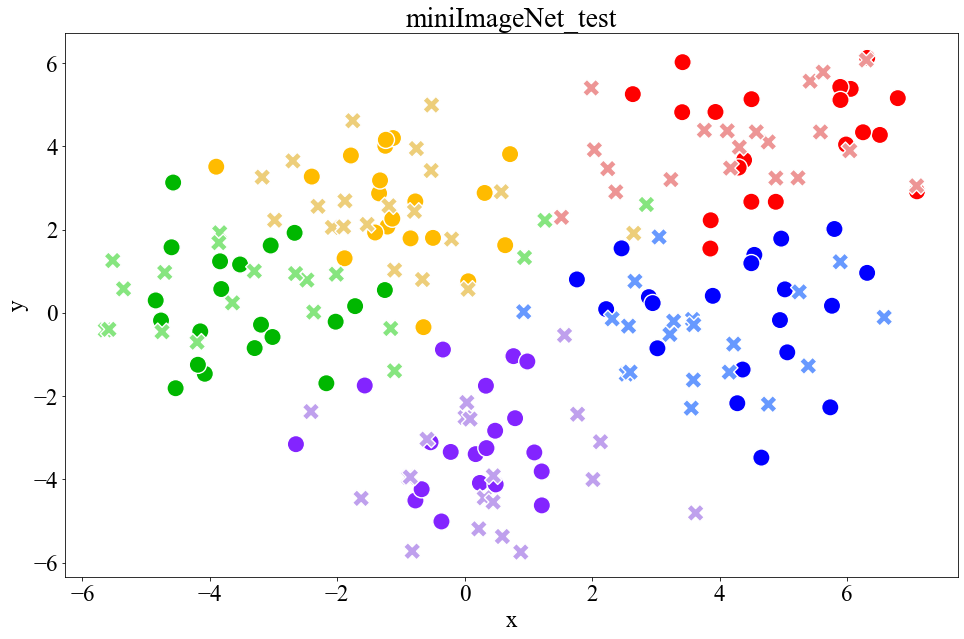


CropDisease

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 3.066980


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.488640
[t-SNE] KL divergence after 950 iterations: 0.357655


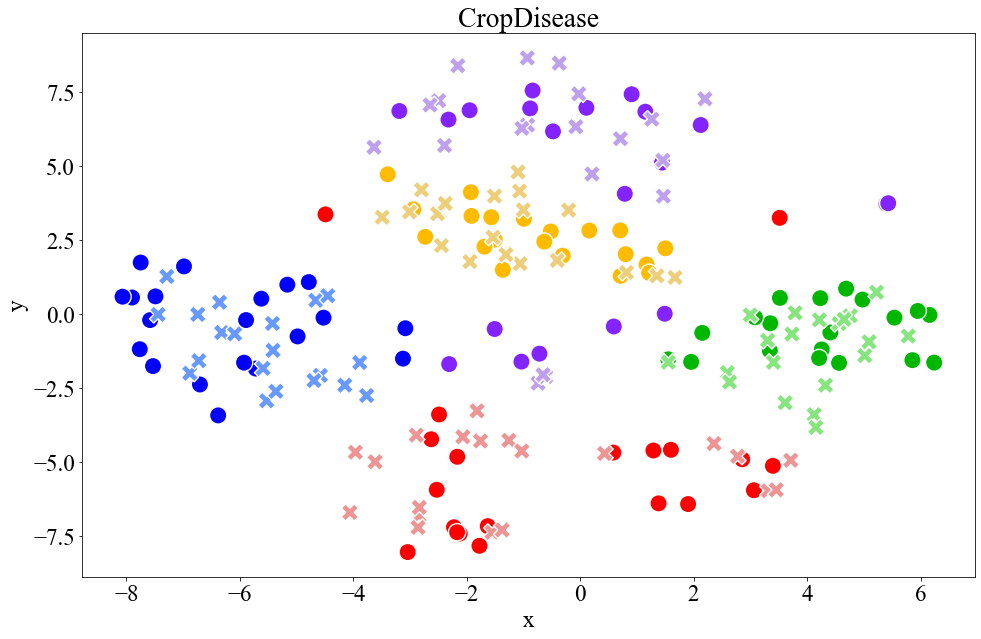


EuroSAT

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 3.341937


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.304176
[t-SNE] KL divergence after 1000 iterations: 0.362759


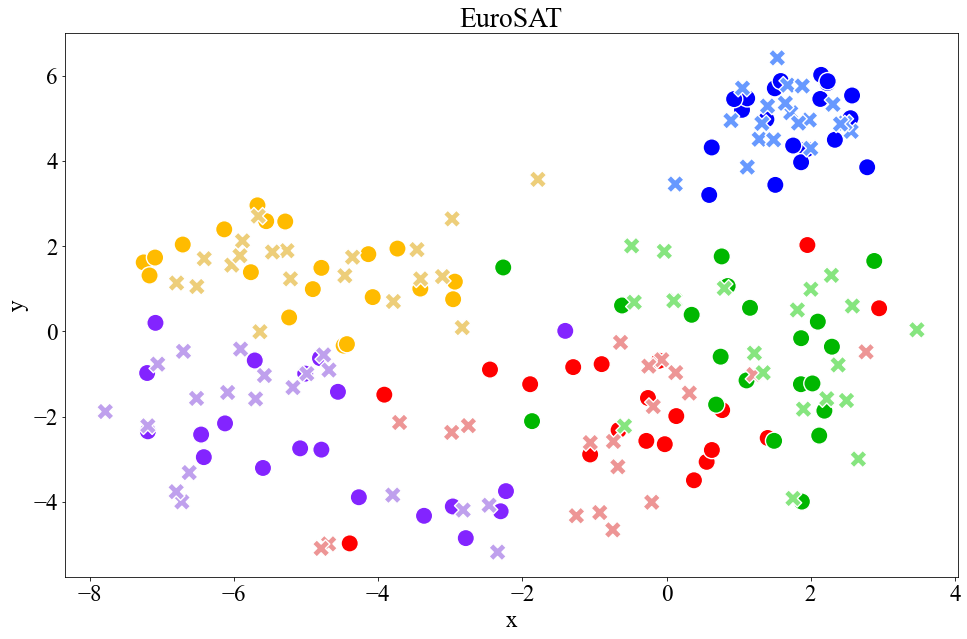


ISIC

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 2.942486


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.744732
[t-SNE] KL divergence after 1000 iterations: 0.510788


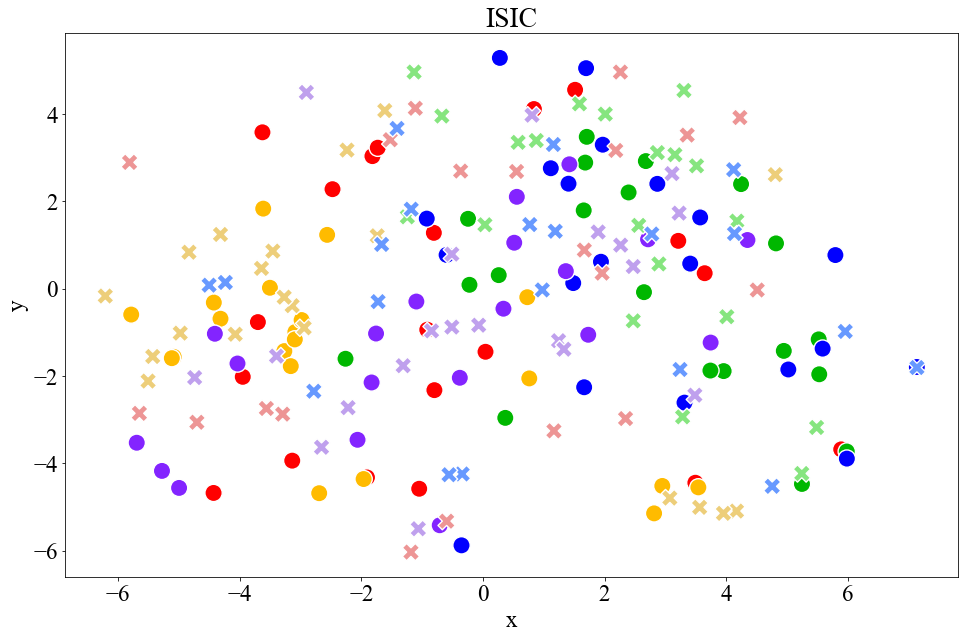


ChestX

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 2.086298


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.496914
[t-SNE] KL divergence after 1000 iterations: 0.658300


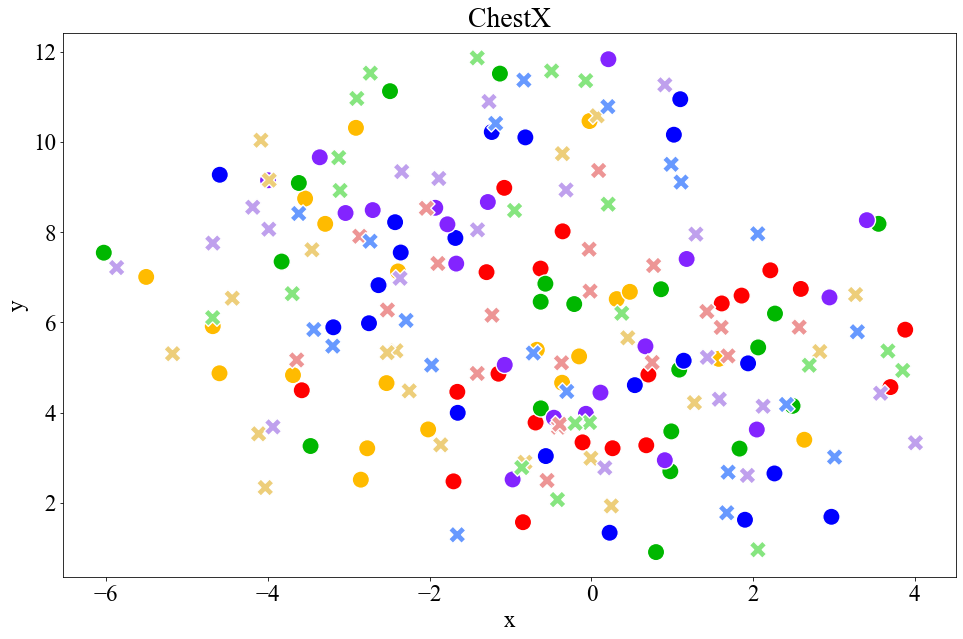

In [230]:
#f, axes = plt.subplots(2,3, figsize=(30,20))
row=0
col=0
for data in datas_full_name: 
    print("\n{}\n".format(data))
    # # source
    # source_feature_path = './feature/miniImageNet/baseline/source_df.csv'
    # df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
    # df_source.columns = list(range(512))
    # df_source['label'] = np.repeat(np.arange(5, 10), 20)
    # df_source['class'] = 'source'

    # clean support 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]
    df_support['label'] = np.repeat(np.arange(5), 20)
    df_support['class'] = 'support'

    # query
    df_query = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    query_feature_path = './feature/{}/baseline/query.npy'.format(data)
    query_feature = np.load(query_feature_path)
    for i in range(1, 101):
        df_query.loc[i,:] = query_feature[i-1]
    df_query['label'] = np.repeat(np.arange(5,10), 20)
    df_query['class'] = 'query'

#     # mixup
#     df_mixup = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     mixup_feature_path = './feature/{}/mixup/support.npy'.format(data)
#     mixup_feature = np.load(mixup_feature_path)
#     for i in range(1, 101):
#         df_mixup.loc[i,:] = mixup_feature[i-1]
#     df_mixup['label'] = np.repeat(np.arange(5), 20)
#     df_mixup['class'] = 'support'

#     # cutmix
#     df_cutmix = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     cutmix_feature_path = './feature/{}/cutmix/support.npy'.format(data)
#     cutmix_feature = np.load(cutmix_feature_path)
#     for i in range(1, 101):
#         df_cutmix.loc[i,:] = cutmix_feature[i-1]
#     df_cutmix['label'] = np.repeat(np.arange(5), 20)
#     df_cutmix['class'] = 'target'

#     # flip
#     df_flip = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     flip_feature_path = './feature/{}/flip/support.npy'.format(data)
#     flip_feature = np.load(flip_feature_path)
#     for i in range(1, 101):
#         df_flip.loc[i,:] = flip_feature[i-1]
#     df_flip['label'] = np.repeat(np.arange(5), 20)
#     df_flip['class'] = 'target'
    
#     # crop
#     df_crop = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     crop_feature_path = './feature/{}/crop/support.npy'.format(data)
#     crop_feature = np.load(crop_feature_path)
#     for i in range(1, 101):
#         df_crop.loc[i,:] = crop_feature[i-1]
#     df_crop['label'] = np.repeat(np.arange(5), 20)
#     df_crop['class'] = 'target'
    
    df = pd.concat([df_support, df_query], axis=0, join='inner')
    data_subset = df.iloc[:, :512].values
    data_subset.shape
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)
    
    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=sns.color_palette(colors), 
        style = "class",
        data=df,
        s = 300,
        legend=False,
        #ax=axes[row,col],
    )
    plt.title(data)
    plt.savefig('./img_pdf/tSNE/support_query_diff/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    plt.show()